# EN.553.436/636 Midterm 2 (Spring 2024)
### Guidelines/integrity:
- The test is open personal/course notes, section/lecture notebooks, and online documentation. However you are:
    - not allowed to communicate with anyone/anything, including interactions with both humans and AIs, e.g. ChatGPT and Bard. 
    - not allowed to search on stack exchange.
- **Look only at your own screen** when doing the exam. Do not peek/look at other people's work. 
- **Do not use any messaging or communication** during the exam.
- **Do not communicate about the exam to anyone or anything** for at least 1 week after the exam is taken.

### Time/submission:
- Finish the exam within a **70-minute** time interval. (Students with extra time accomodations should adjust this limit accordingly.)
- **BEFORE LEAVING, UPLOAD THE FOLLOWING**
    1. **PDF TO GRADESCOPE**
    2. **IPYNB TO CANVAS**
- The time stamp of your submission is the moment you upload it. After uploading, you can take your time to (re)assign pages to problems.
- Students with extra time accomodation may use the additional alloted time to complete the exam. Gradescope will show "late submission accepted", that window is specifically for you. You will not be penalized for "late submission".

### Remark:
- Some questions ask for text responses. The graders will be looking for **brief, incisive** remarks that indicate depth of understanding.

# <span style="color:red"> Honor Statement: </span>
I have read the above instructions before starting my exam and agree to follow it. 
### Signature: Kevin Xu
### Start Time: 12:05
### End Time: 1:07 

You should have downloaded the files
- 'midterm2-sp24-q12-data.csv'
- 'midterm2-sp24-q3-data.csv'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
Load the data for problem 1 and 2. Run the cell to plot it below.
- `X1` is the coordinates of the data, number of data by number of dimensions
- `y1` is the label of the data

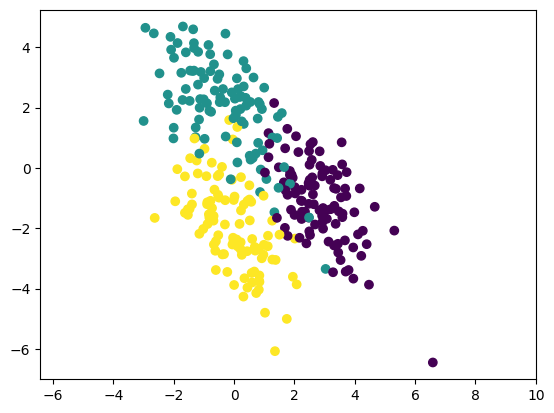

In [2]:
data1 = np.loadtxt('midterm2-sp24-q12-data.csv', delimiter=',')

X1 = data1[:,:2]
y1 = data1[:,2]

plt.scatter(X1[:,0],X1[:,1],c=y1)
plt.axis('equal'); plt.show()

Consider using Gaussian Naive Bayes (GNB) and Linear Discriminant Analysis (LDA) to perform classification on data1.

## 1.1 GNB
[2 pt] Why is GNB not likely to be an appropriate classification model for data1? Your response should mention both the data and the modelling assumptions.

**Ans:** GNB assumes that features are independent from each other, i.e. non-diagonals in the covariance matrix are 0, which is not the case here with this data as they are correlated among the classes and you can see in the skewed elliptical shapes. 

## 1.2 LDA
[2 pt] Based on the scatter plot of the data, why might LDA be an appropriate model for classification? Your response should mention both the data and the modelling assumptions.

**Ans:** LDA assumes that all classes have the same covariance matrices. All the different classes in the data seem to be distributed with a similar covariance matrix among all the different classes, which are perfect for the assumptions for LDA modeling assumptions.

## 1.3 Implement LDA
[3 pt] Implement LDA on data1.
- You should use sklearn
- Use a train-test split on X1 and y1
    - test size is 30% of all data
    - set random_state=0
- Print test accuracy of the model in an informative way.

In [3]:
# TODO classify and print accuracy
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
lda = LinearDiscriminantAnalysis()
lda.fit(X1_train, y1_train)

print(f"Test accuracy: {lda.score(X1_test, y1_test)}")

Test accuracy: 0.9111111111111111


# Problem 2
Let there be n_init number of random initializations for k-means.

## 2.1 Choosing optimal centroids
[1 pt] Once we have obtained all centroids from performing the k-means algorithm using all n_init number of random initializations, explain how the optimal centroids for k-means clustering is eventually chosen.

**Ans:** Kmeans works by iteratively finding centroids on each iteration based on current centroids, assigning points based on being closest to the centroids, recalculating centroids, and then repeating the process. The process is done by constantly iterating through data points, assigning each data point to nearest pre-selected centroid from the previous iteration, and then calculating the new centroid of each cluster and saving that as the next centroid, then repeating the process for the next iteration. This will eventually converge when the difference between iterations are minimal. K-means selects centroids based on choosing centroids that decrease the distance between them and the data points within the centroid (distance is usually square distance). Centroids are picked so the sum of these distances is minimized.

## 2.2 Number of initializations

[1 pt] Explain how using more initializations for k-means is beneficial. In other words, why do we choose n_init to be a large number instead of a small one?

**Ans:** Initializations are random in k-means, so we want to choose an n_init to be a large number since having more initializations allows for a better chance of finding a good clustering.

## 2.3 Debug
Run the cell below.

The code below is supposed to:
- cluster X1 into 3 clusters using kmeans, with 100 random initialization. 
- Plot the clustering results and corresponding centroids.


[2 pt] There are 2 errors in two separate lines of the code in cell below. 
- Describe what those errors were and how you fixed them.
- Rerun the cell with corrected code to accomplish what the code was intended to do.

**Ans:**

1. Error 1: We need to specify the number of clusters in the code, here I fixed it to specify 3 clusters 

2. Error 2: We are using y1 to label the clusters in the code instead of the predicted labels L. I changed the code to use L from the fit kmeans model instead 

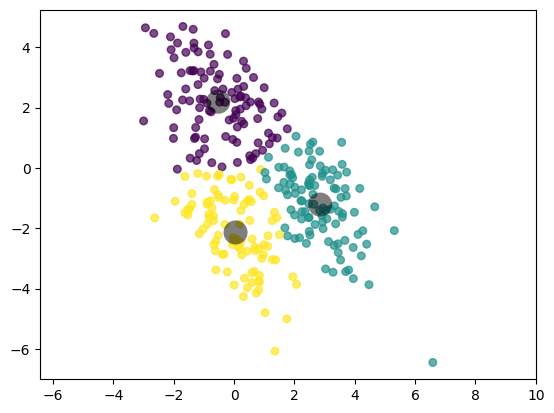

In [9]:
# TODO debug
import warnings # ignore msg about mem leak in MKL on windows
warnings.filterwarnings('ignore', message='Kmeans') 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=100, init='random') # Error 1: We need to specify the number of clusters by setting n_clusters=3
kmeans.fit(X1)
C, L = kmeans.cluster_centers_, kmeans.labels_

plt.scatter(X1[:,0],X1[:,1],c= L,marker='o',s= 30,alpha=0.7) # Error 2: we are using y1 to color the points, instead we should use the predicted cluster labels L
plt.scatter(C[:,0] , C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none')
plt.axis('equal'); plt.show()

# Problem 3
Load `X3` and run the cell below to plot it. 
- `X3` is the coordinates of the data, number of data by number of dimensions.
- There are 3 clusters in the data.

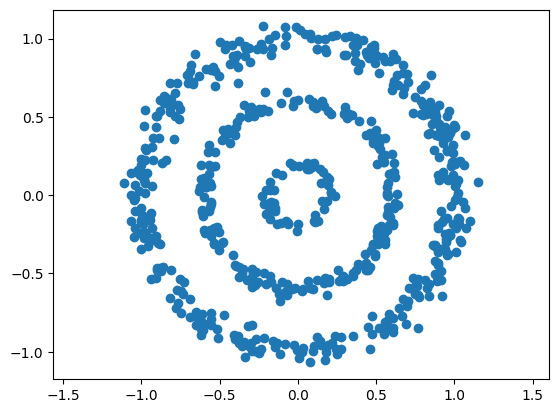

In [10]:
X3 = np.loadtxt('midterm2-sp24-q3-data.csv', delimiter=',')

plt.scatter(X3[:,0],X3[:,1])
plt.axis('equal'); plt.show()

## 3.1 Describe
[1 pt] What is the code cell below performing?  Give a brief description.

**Ans:** It is calculating the squared Euclidean distance between each pair of points in X3  

In [11]:
m1 = X3[np.newaxis, :, :]
m2 = X3[:, np.newaxis, :]

r = m1 - m2
r *= r 
d2 = r.sum(axis=2)

## 3.2 Adjacency
Define the (i,j) entry of weighted adjacency matrix as
$$W[i,j] = \exp \left(- \frac{d(x_i, x_j)^2}{2\gamma^2} \right)$$
- $d(x_i, x_j)$ is the distance between the ith and jth data points
- Your choice of parameter `gamma` should lead to successful clustering. It may help to complete all the rest of the code first and then returning back to adjust gamma accordingly.


[1 pt] Compute weighted adjacency matrix `W` using the RBF kernel.

In [109]:
gamma = 1/15
W = np.exp(-d2/(2*(gamma**2)))

## 3.3 Normalized Laplacian
Define the normalized Laplacian as
$$L_n = D^{-1/2} L D^{-1/2}$$
- $L$ is the usual Laplacian $L=D-A$ we saw in class
- $D$ is the degree matrix, with diagonal elements $d_{ii}$
- $D^{-1/2}$ is the diagonal matrix with diagonal elements $\sqrt{\frac{1}{d_{ii}}}$
- You may refer to lecture notes, where it is also defined.

[2 pt] Compute normalized Laplacian `L_n` and its eigenvectors `v`.

(If you fail to implement normalized Laplaican, you can still obtain credit for later problems by implementing usual Laplacian. But you will not gain full credit on this subpart.)

In [110]:
# TODO compute normalized laplacian
dd = W.sum(axis=0)
D = np.diag(dd)

L = D - W

# to take D^(-1/2)
D_inv = np.linalg.inv(D)
D_inv_sqrt = np.sqrt(D_inv)

L_n = D_inv_sqrt @ L @ D_inv_sqrt

# TODO compute eigenvectors
v = np.linalg.eigh(L_n)[1]

## 3.4 Cluster
[2 pt] Perform clustering on the data using the embedding on the first 2 nontrivial eigenvectors.
- You may use simple thresholding, sklearn k-means, or sklearn Gaussian mixture model.
- store the cluster labels as `labels`

In [113]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=0)
X_curr = v[:,1:3]
gmm.fit(X_curr)

labels = gmm.predict(X_curr)

## 3.5 Plot
[1 pt] Plot the clustering result, both on the embedded space (first 2 nontrivial eigenvectors) and original space.
- this code has been written for you. You can modify it as necessary.

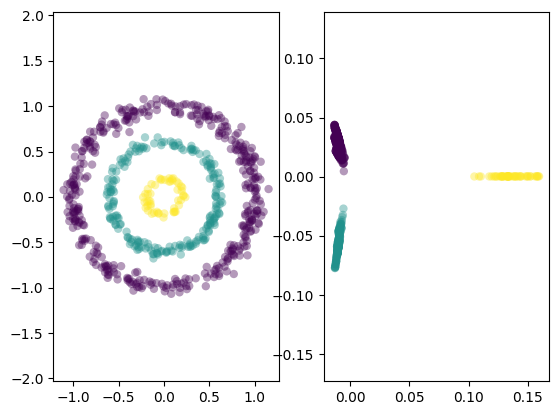

In [114]:
plt.subplot(121)
plt.scatter(X3[:,0],X3[:,1],c=labels,edgecolor='none',alpha=0.4)
plt.axis('equal') 

plt.subplot(122)
plt.scatter(v[:,1],v[:,2],c=labels,edgecolor='none',alpha=0.4)
plt.axis('equal')

plt.show()


# <span style="color:red"> END OF MIDTERM </span>